In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

# search model's results

In [15]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.files import search_for_filedirs

survey_name = 'alerceZTFv7.1'
kf = 0
set_name = f'{kf}@r_val' # r_train s_val r_val r_test
mode = 'ft' # pt ft
root_folder = f'../save/experiments/{set_name}/{mode}'
print(root_folder)
filedirs = search_for_filedirs(root_folder, fext='metrics', verbose=0)
cfiledirs = [fd.split('/')[-2] for fd in filedirs] # delete id
for cfiledir in set(cfiledirs):
    print(f' - cfiledir: {cfiledir} (ids: {cfiledirs.count(cfiledir)})')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../save/experiments/0@r_val/ft
 - cfiledir: mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°cell=GRU°mode=ft°ef-be=1e-06°rsc=0 (ids: 11)
 - cfiledir: mdl=SerialAttnTCNN°in-dims=2°te-dims=32°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=1 (ids: 6)
 - cfiledir: mdl=SerialAttnTCNN°in-dims=2°te-dims=32°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0 (ids: 11)
 - cfiledir: mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°cell=LSTM°mode=ft°ef-be=1e-06°rsc=0 (ids: 7)
 - cfiledir: mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0 (ids: 11)
 - cfiledir: mdl=SerialAttnTCNN°in-dims=2°te-dims=8°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0 (ids: 6)
 - cfiledir: mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g80.g80.g80-r80.r80.r80°dec-emb=g80.g80-r80.r

# metrics v/s days

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
metric_name: b-accuracy
model_name: mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g80.g80.g80-r80.r80.r80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0
model_name: mdl=SerialAttnTCNN°in-dims=2°te-dims=32°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0
model_name: mdl=SerialAttnTCNN°in-dims=2°te-dims=32°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=1
model_name: mdl=SerialAttnTCNN°in-dims=2°te-dims=8°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0
model_name: mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°cell=GRU°mode=ft°ef-be=1e-06°rsc=0
model_name: mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°cell=LSTM°mode=ft°ef-be=1e-06°rsc=0
model_name: mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=80-80-80°dec-emb=g80.g80-r80.r80°mode=ft°ef-be=1e-06°rsc=0
metric_name: b-f1score
model_name: mdl=Par

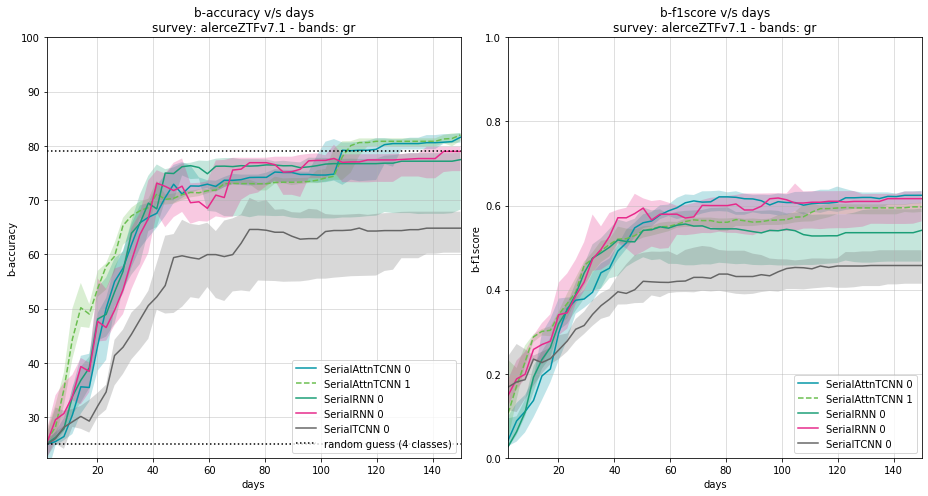

In [20]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_baccu_f1score

plot_baccu_f1score(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_precision_recall

plot_precision_recall(root_folder)

# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(root_folder)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)